## Exploratory Data Analysis 
Remember the goal of EDA is to investigate the relationships between features and the 
relationship between the response variable and the features. Be thoughtful and creative 
about how to deepen your understanding of the data and inform the overall project goal 
with your findings.



Things you may want to evaluate include: 

● Is the response variable unbalanced? 

● What is the distribution of each of the features? 

● Are there features are correlated with a particular response value? 

● Are there collinear features in the data? 

● Are there outliers? 

● What are the seasonal or linear trends? 

Ways to evaluate these include: 

● Histograms or Distribution plots 

● Histograms, Word Count- bigram, trigrams 

● Scatter plots or Bi-plots 

● Pearson correlation coefficients heat map 

● Box plots 

● Line plots 

Please note that the time estimates associated with this step of your capstone are 
approximated — you may take more or less time based on the complexity of your data.

In [52]:
# import all necesary packages and libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Quinn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [53]:
# load the dataset
df = pd.read_csv('sentimentdataset_cleaned.csv')

In [54]:
df.shape

(732, 19)

In [55]:
df["Sentiment_VADER"].value_counts()

Positive    458
Negative    196
Neutral      78
Name: Sentiment_VADER, dtype: int64

In [56]:
df["Sentiment_TextBlob"].value_counts()

Neutral     335
Positive    276
Negative    121
Name: Sentiment_TextBlob, dtype: int64

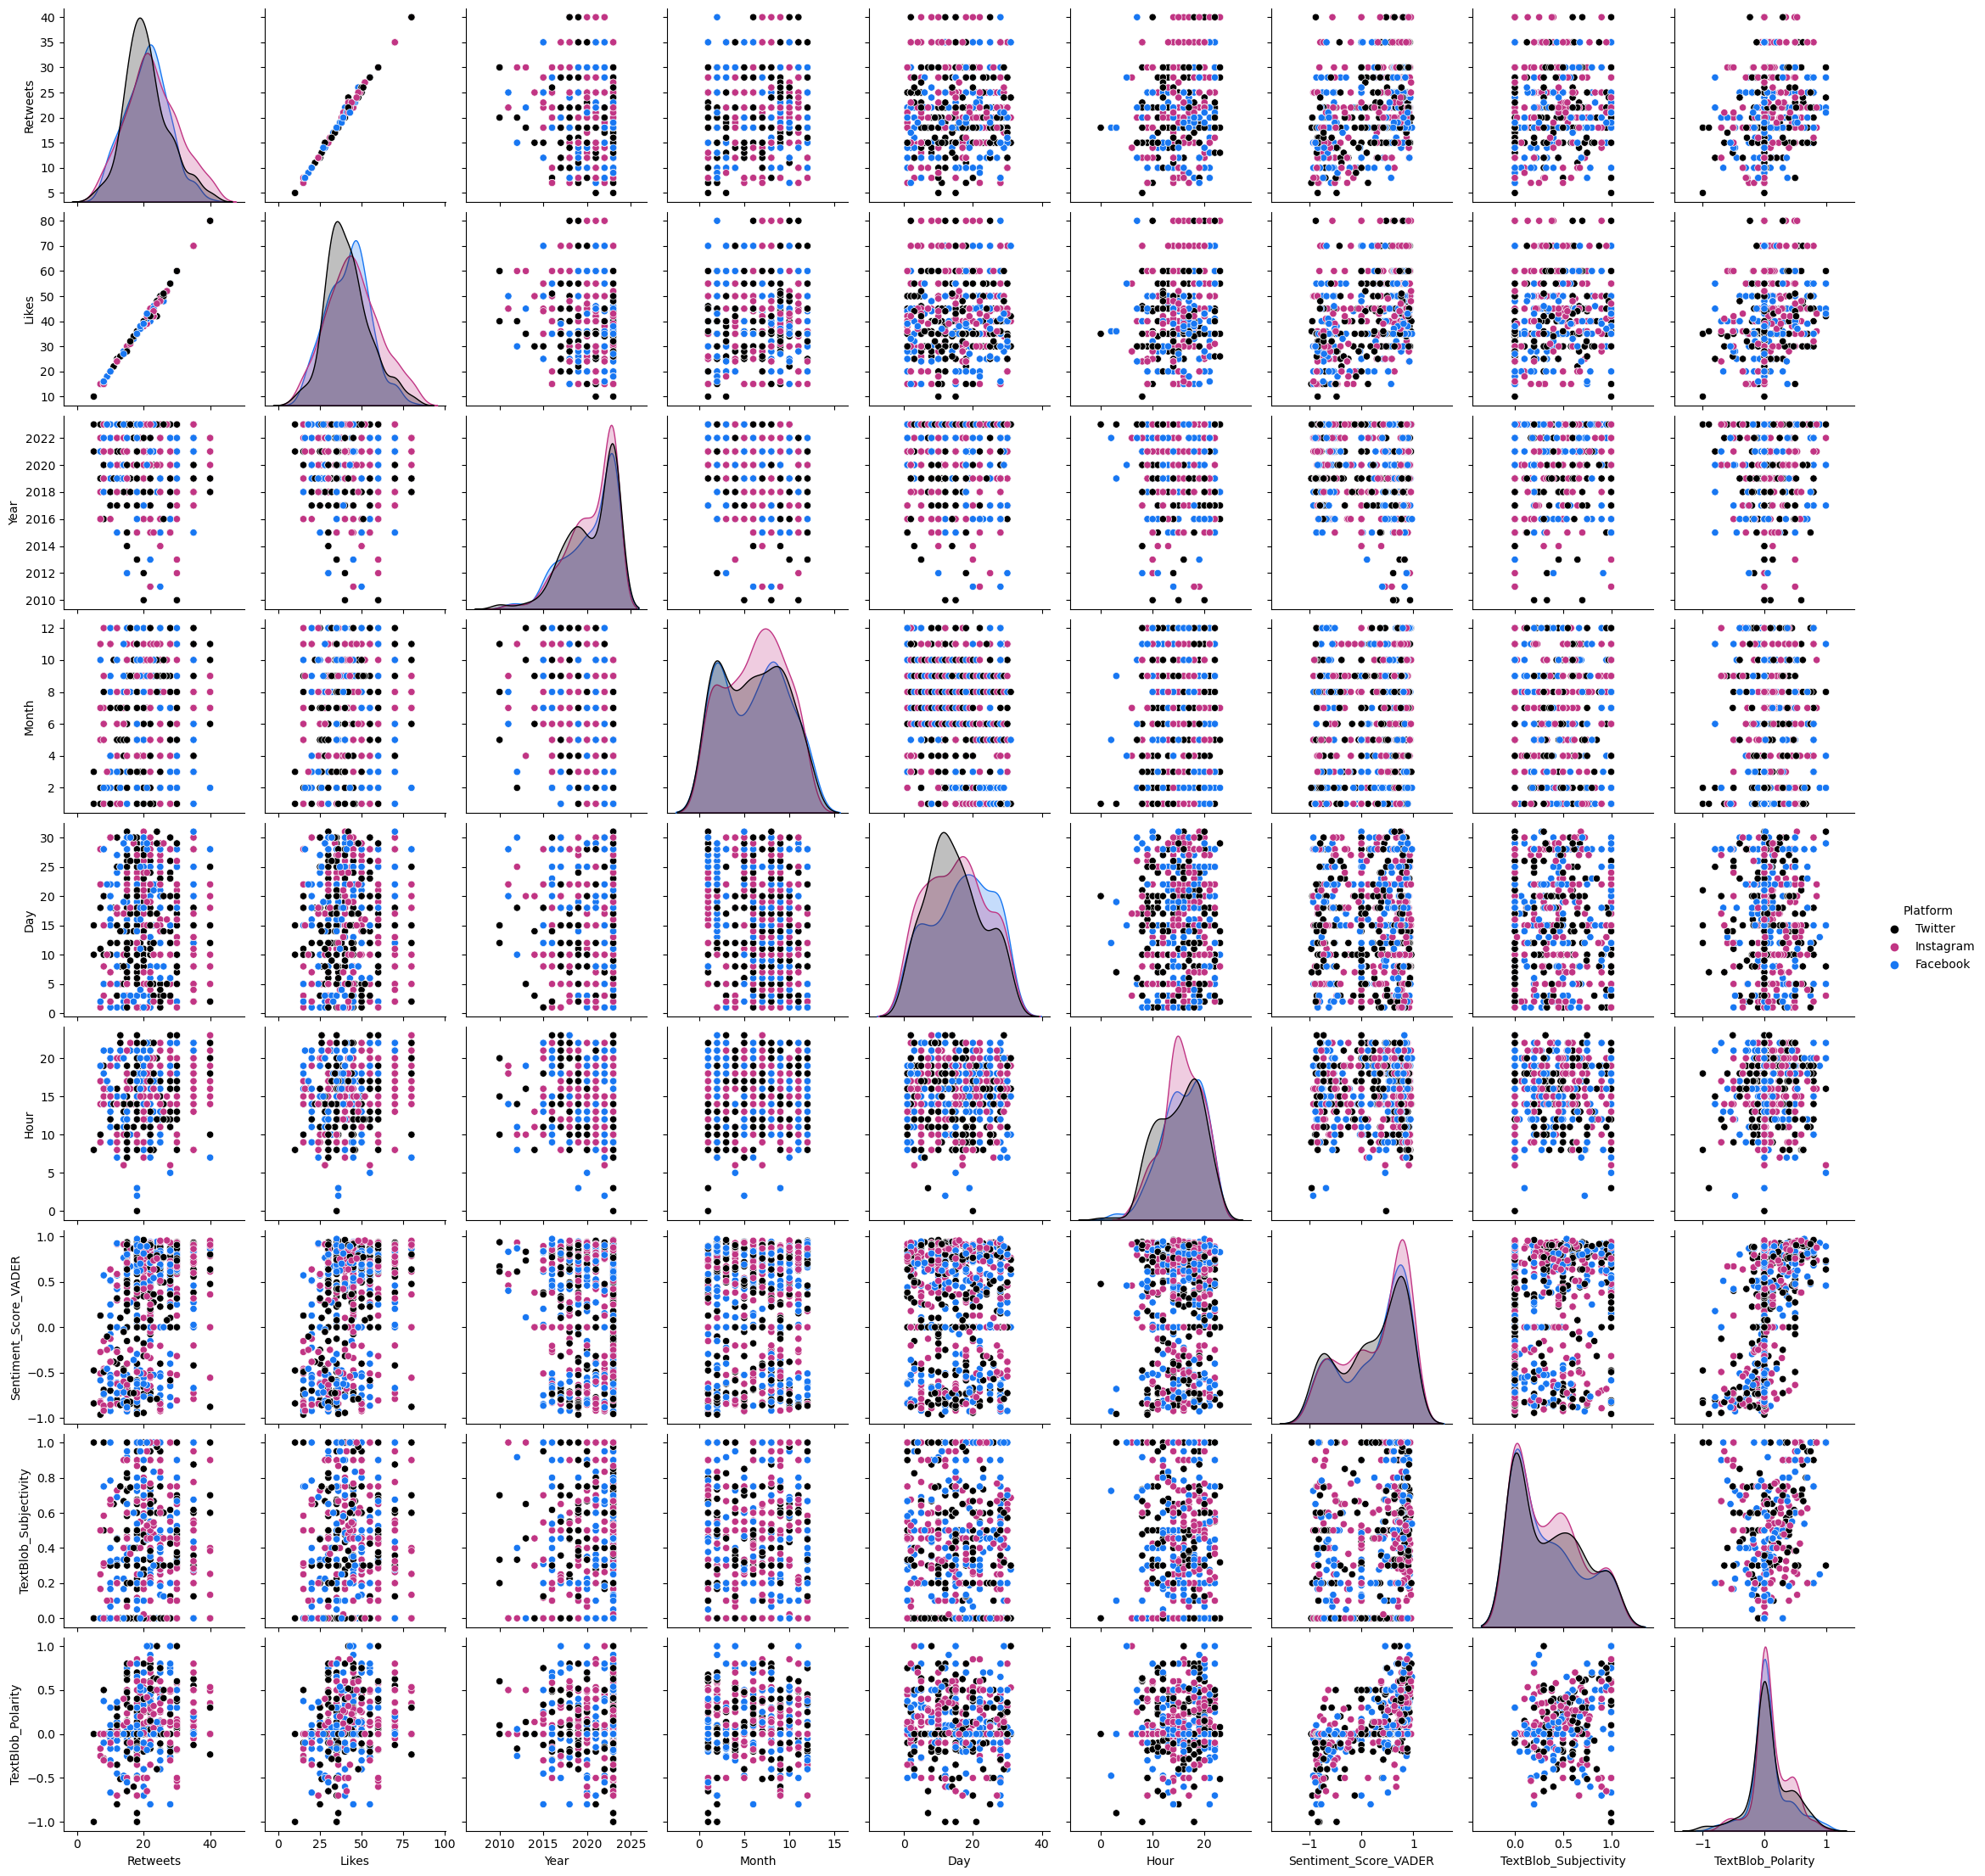

In [57]:
sns.pairplot(df, hue='Platform', palette = ["#000000","#C13584","#1877F2"]) # X, instagram, facebook respectively

Correlation between various features


C:\Users\Quinn\AppData\Local\Temp\ipykernel_43792\643680619.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p=sns.heatmap(df.corr(), annot=True, cmap ='Blues')


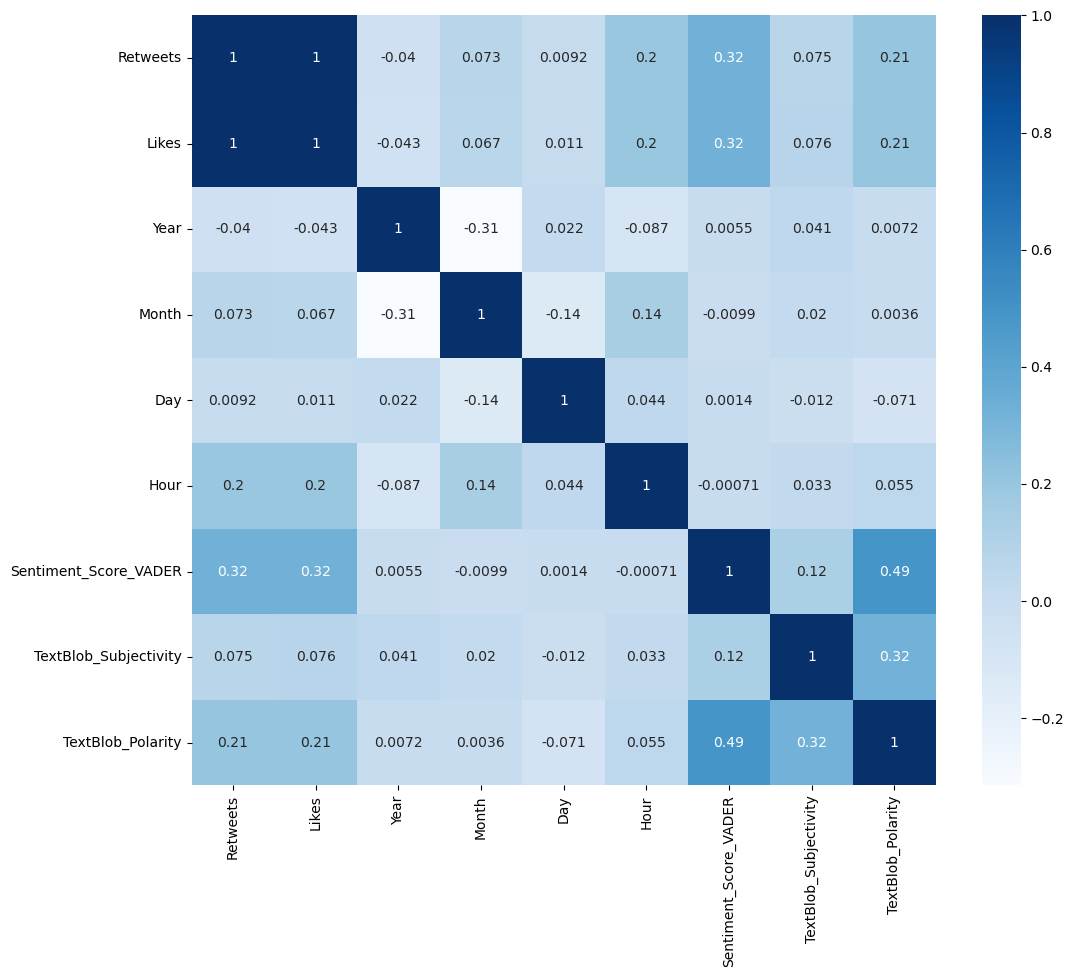

In [58]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(df.corr(), annot=True, cmap ='Blues')

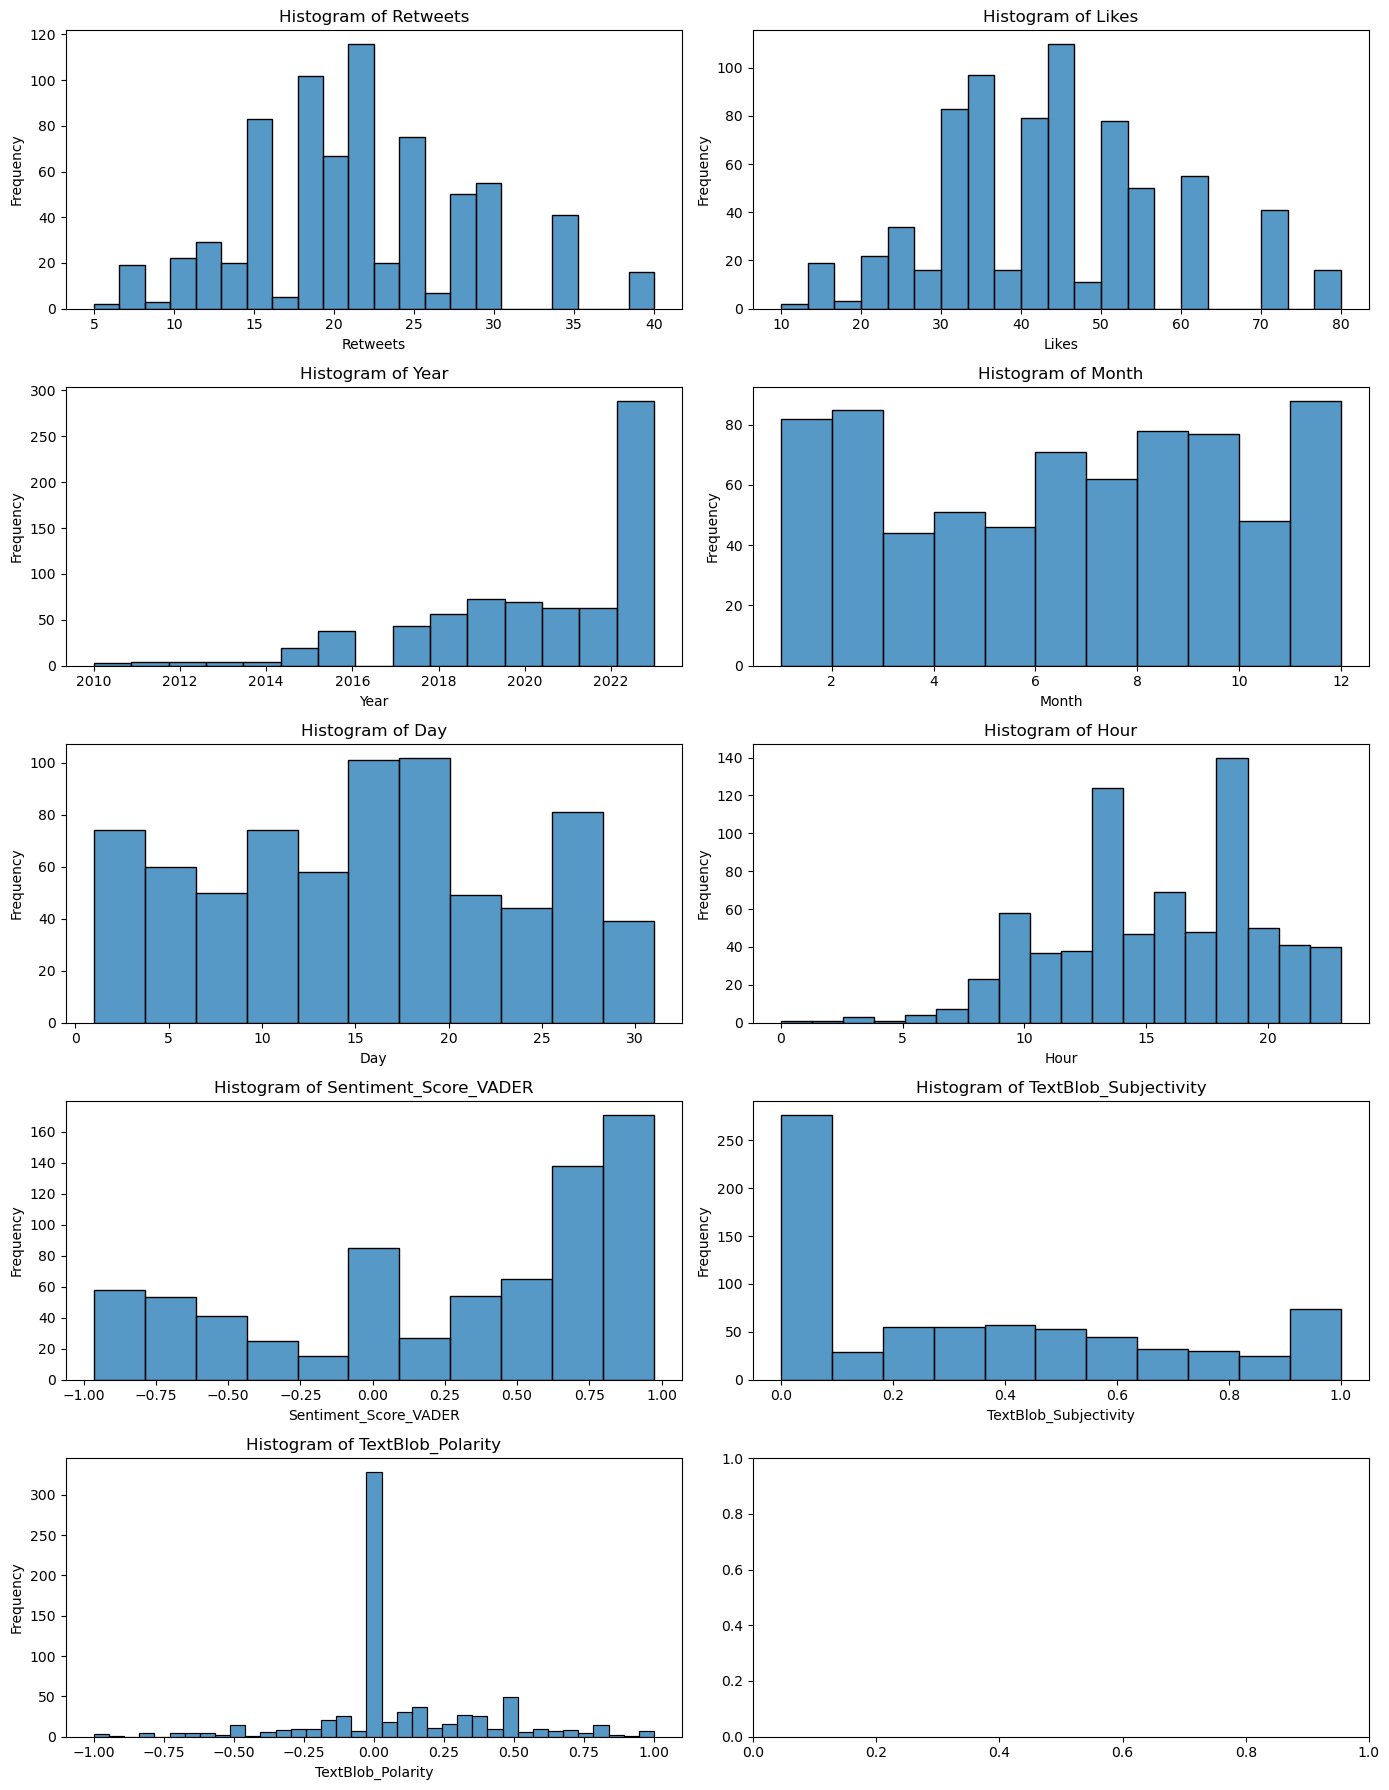

In [62]:
# Identify numeric columns in the dataset
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

# Create histograms for each numeric feature
fig, axes = plt.subplots(nrows=len(numeric_columns)//2 + len(numeric_columns)%2, ncols=2, figsize=(14, len(numeric_columns)*2))
axes = axes.flatten()

for i, feature in enumerate(numeric_columns):
    sns.histplot(df[df[feature].notnull()][feature], kde=False, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Adjust layout
fig.tight_layout()
plt.show()

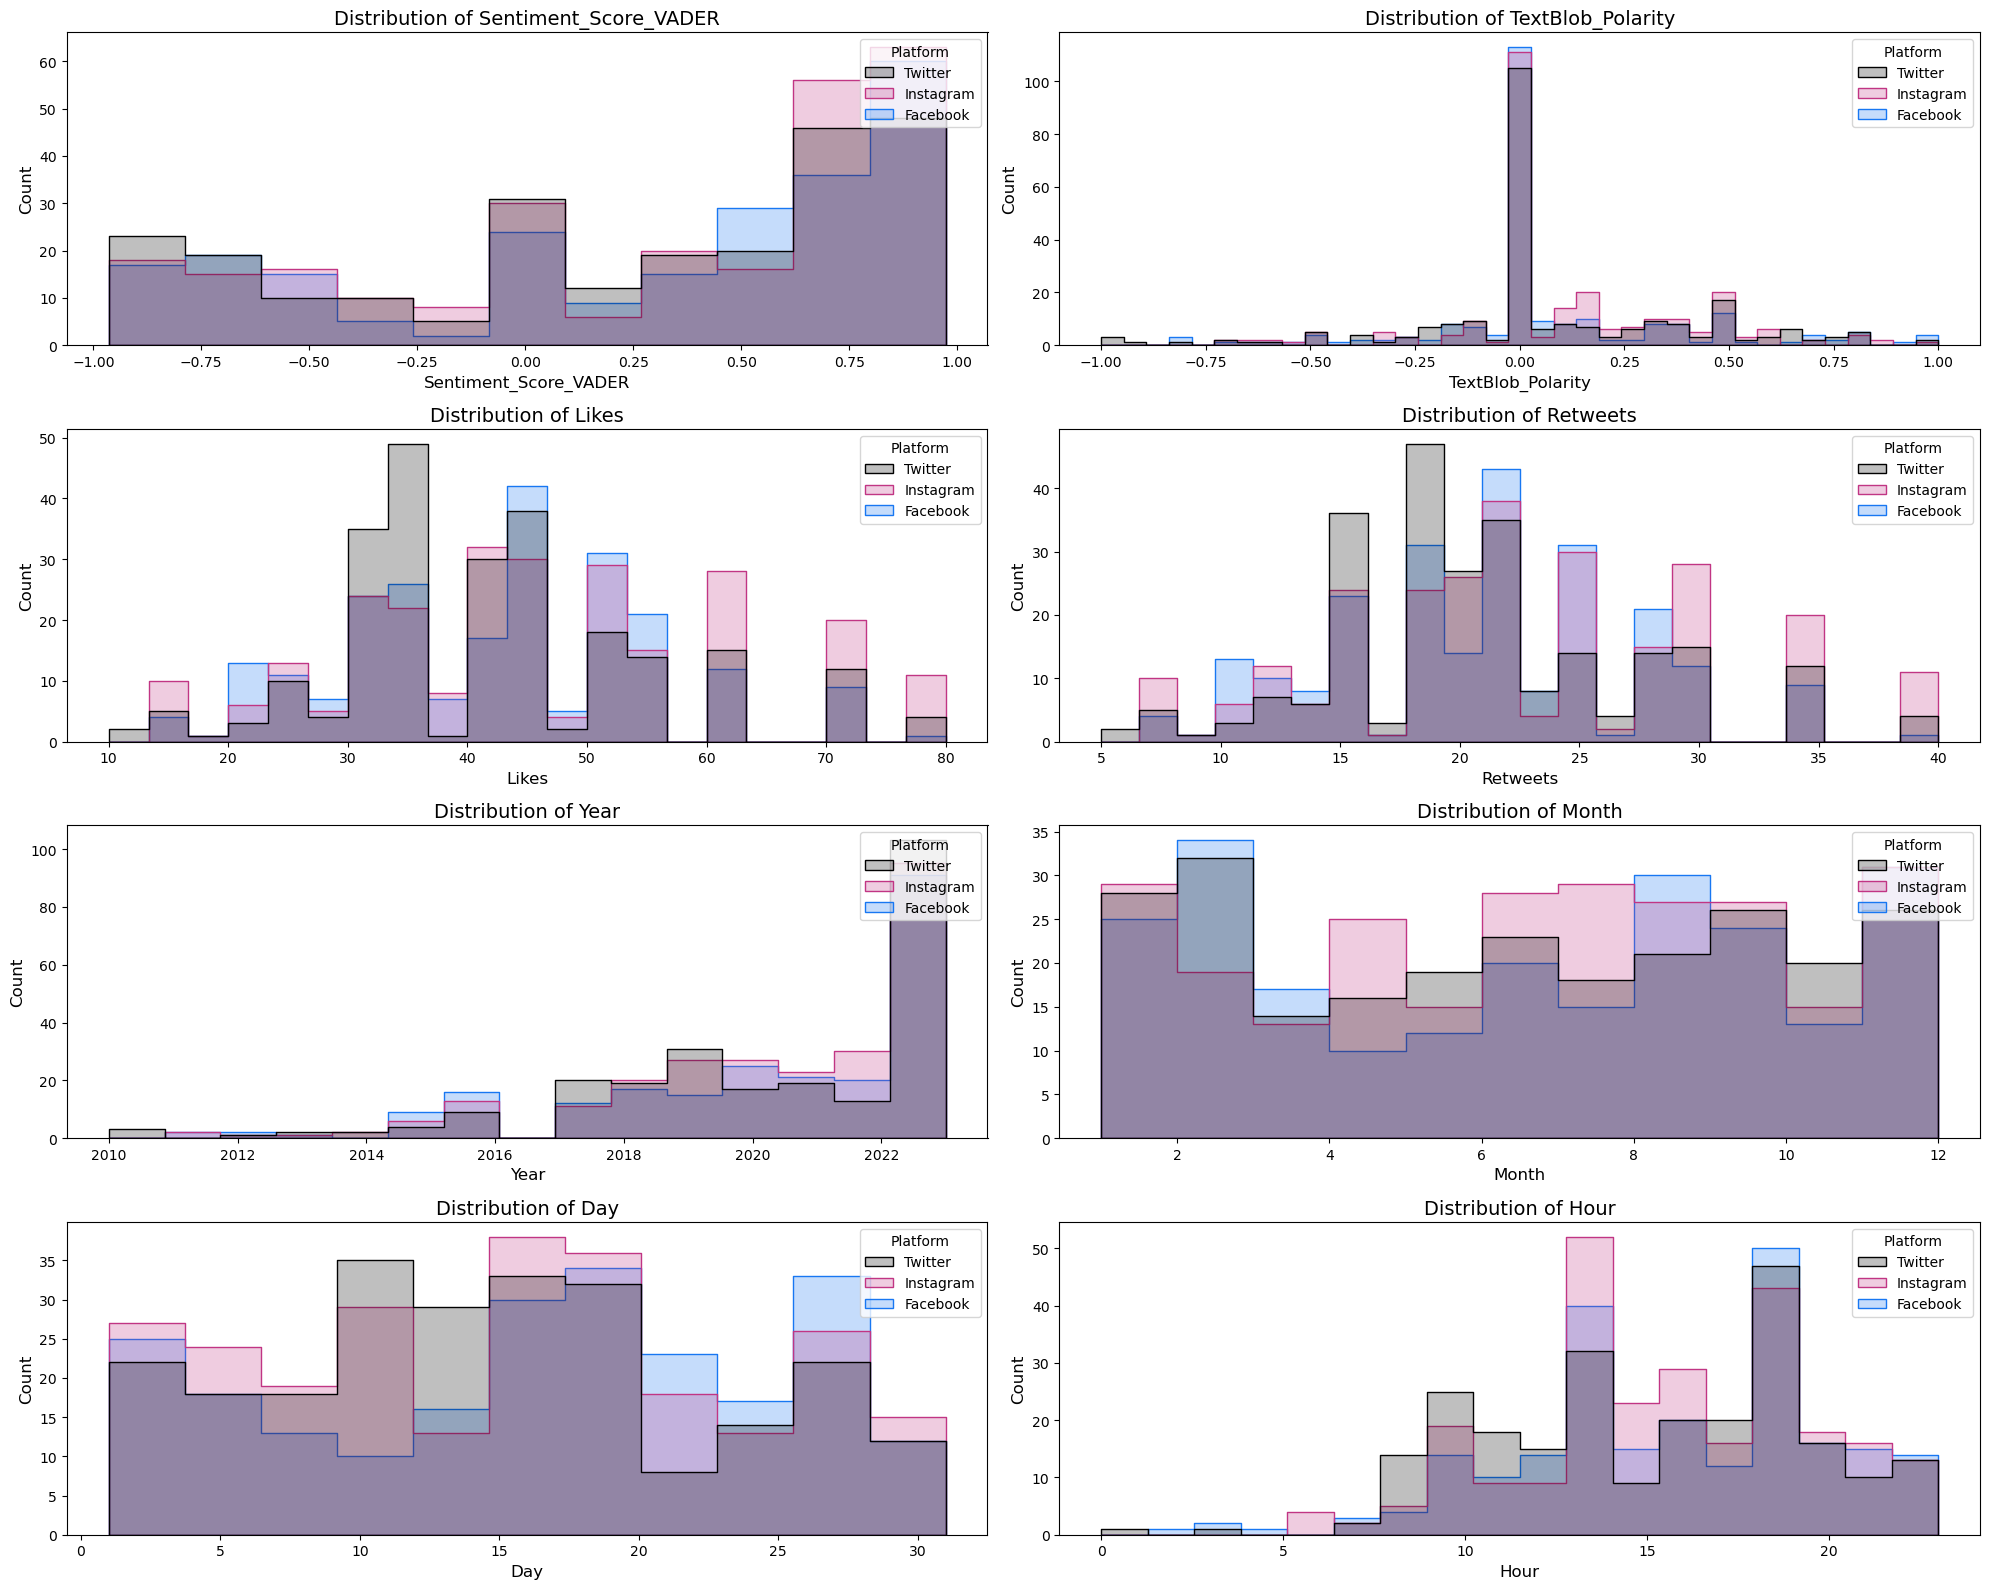

In [107]:
# histograms/distribution plots of every value
# Set the colors for each social media platform
colors = {"Twitter": "#000000", "Instagram": "#C13584", "Facebook": "#1877F2"}

# Define the  features to plot,
numerical_features = ['Sentiment_Score_VADER', 'TextBlob_Polarity', 
                      'Likes', 'Retweets', 'Year', 'Month', 'Day', 'Hour' ]

# Create histograms for each numerical feature
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 16))
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, hue="Platform", palette=colors, element="step", ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

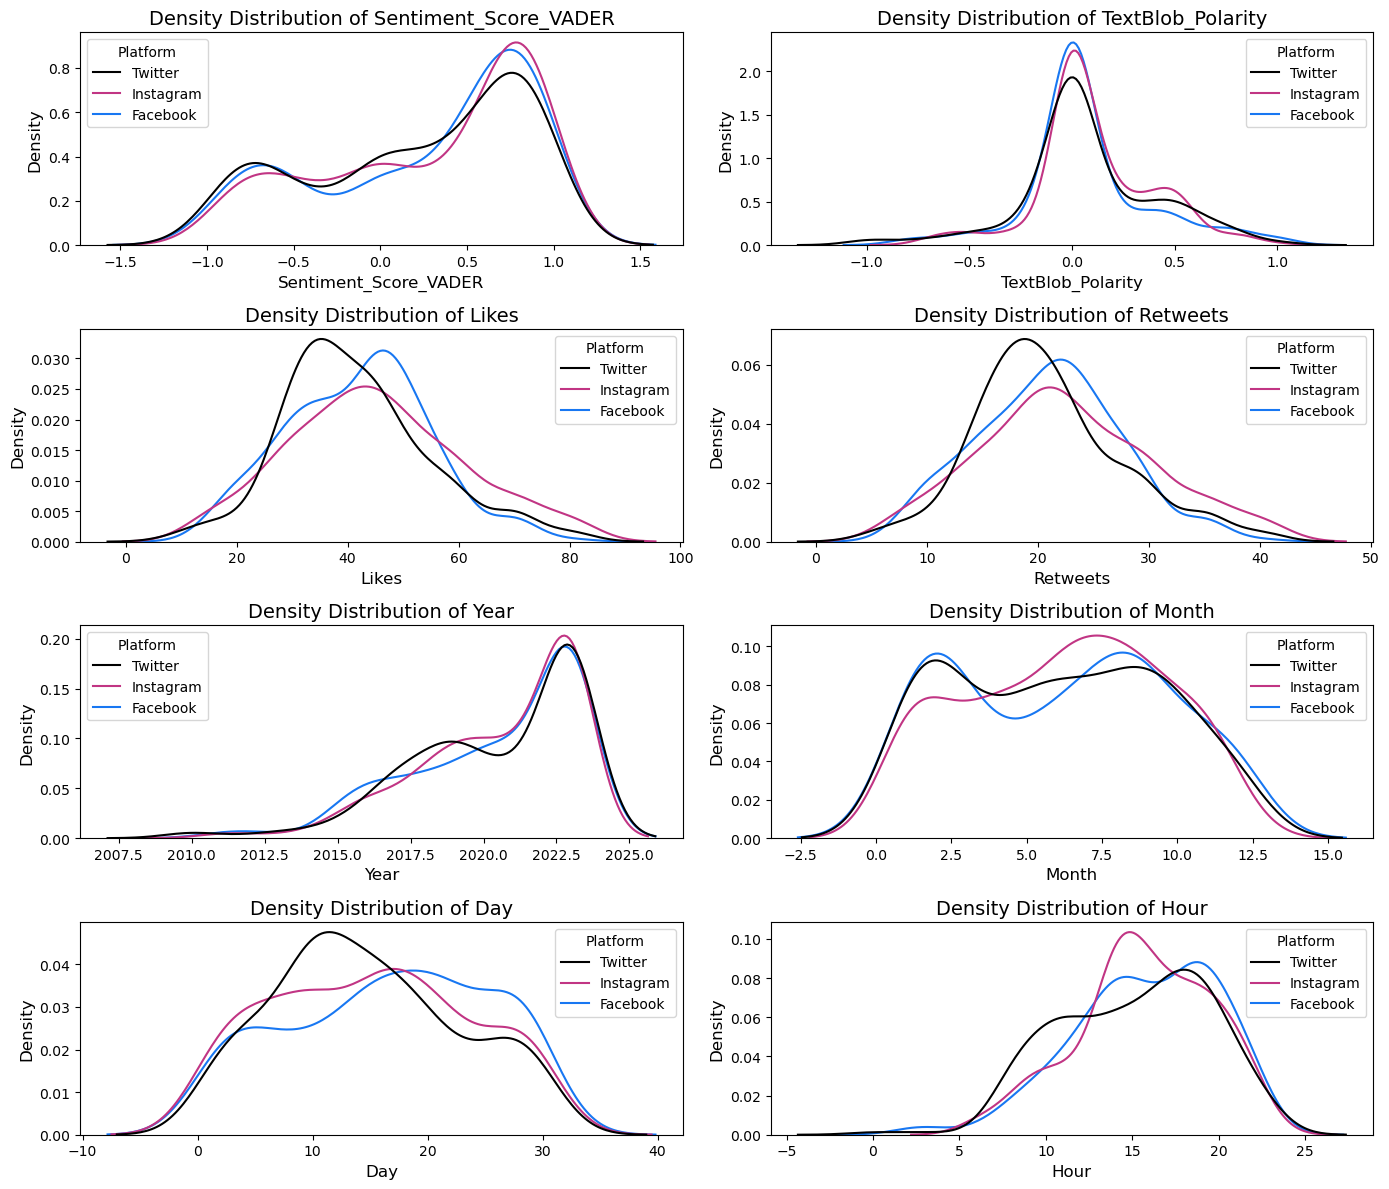

In [108]:
# Create distribution plots for each numerical feature
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 12))
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, feature in enumerate(numerical_features):
    sns.kdeplot(data=df, x=feature, hue="Platform", palette=colors, ax=axes[i], common_norm=False)
    axes[i].set_title(f'Density Distribution of {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Density', fontsize=12)

plt.tight_layout()
plt.show()

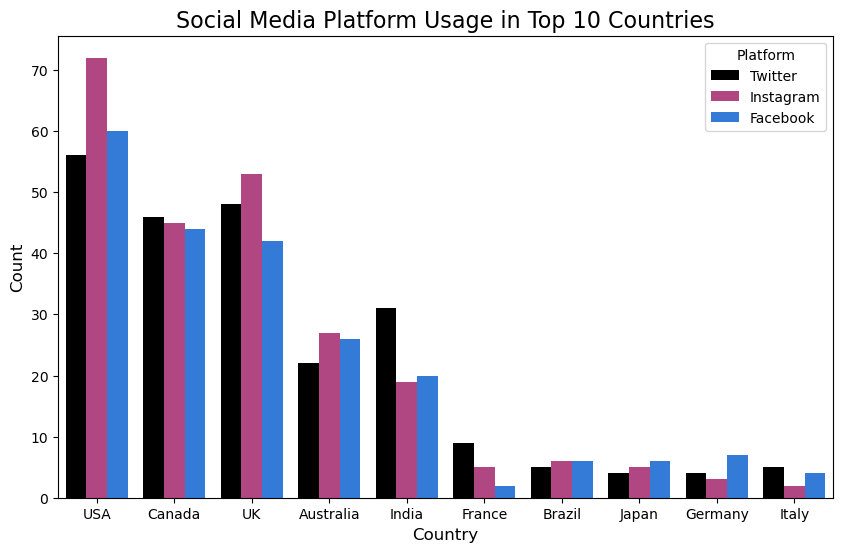

In [65]:
#figure out which platforms are most popular in each of the top 10 countries in the dataset

# Determine the top 10 countries with the most entries
top_countries = df['Country'].value_counts().head(10).index.tolist()

# Filter the data for these top countries
filtered_data = df[df['Country'].isin(top_countries)]

# Create a countplot showing platform usage in the top 10 countries
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=filtered_data, x='Country', hue='Platform', palette=colors)
ax.set_title('Social Media Platform Usage in Top 10 Countries', fontsize=16)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.legend(title='Platform')
plt.show()

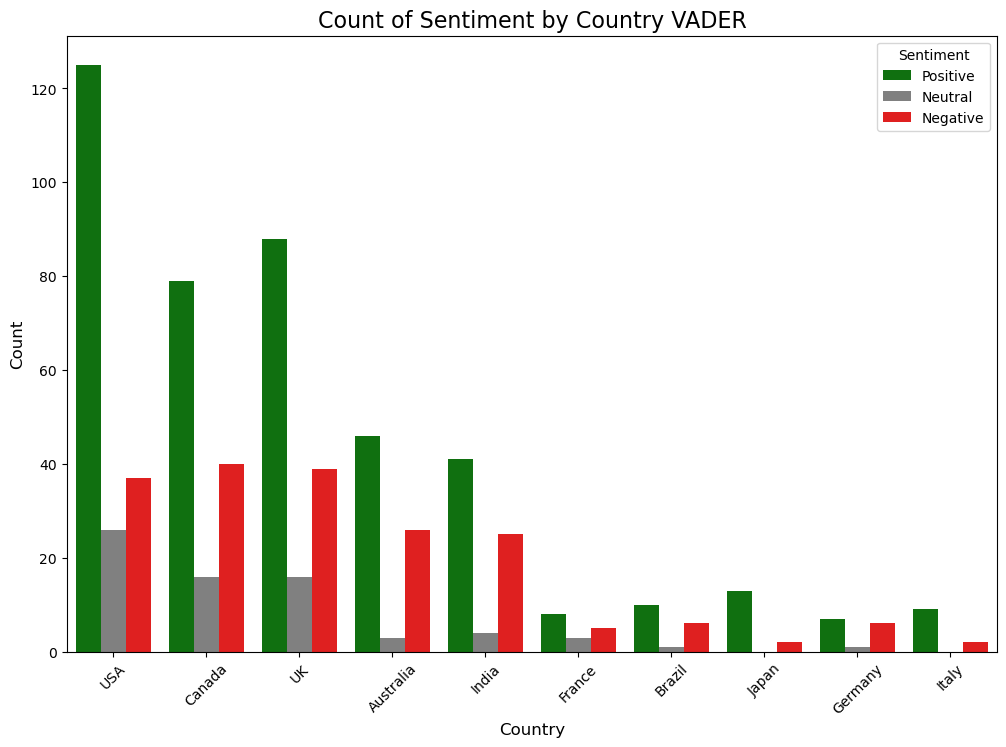

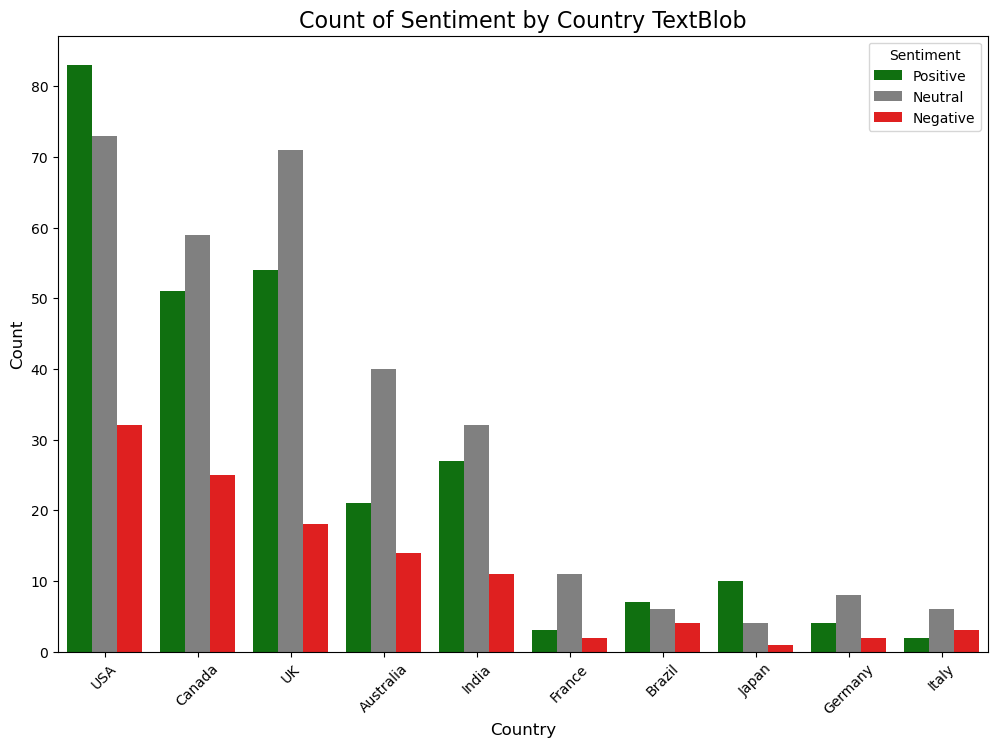

In [69]:
# Filter the data for these top countries
filtered_data = df[df['Country'].isin(top_countries)]

sentiment_order = ['Positive', 'Neutral', 'Negative']
palette = {'Positive': 'green', 'Neutral': 'grey', 'Negative': 'red'}

# Create a countplot of sentiment distribution by country
plt.figure(figsize=(12, 8))
sns.countplot(data=filtered_data, x='Country', hue='Sentiment_VADER', palette=palette, hue_order=sentiment_order)
plt.title('Count of Sentiment by Country VADER', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate the country names for better visibility if necessary
plt.legend(title='Sentiment')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=filtered_data, x='Country', hue='Sentiment_TextBlob', palette=palette, hue_order=sentiment_order)
plt.title('Count of Sentiment by Country TextBlob', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate the country names for better visibility if necessary
plt.legend(title='Sentiment')
plt.show()

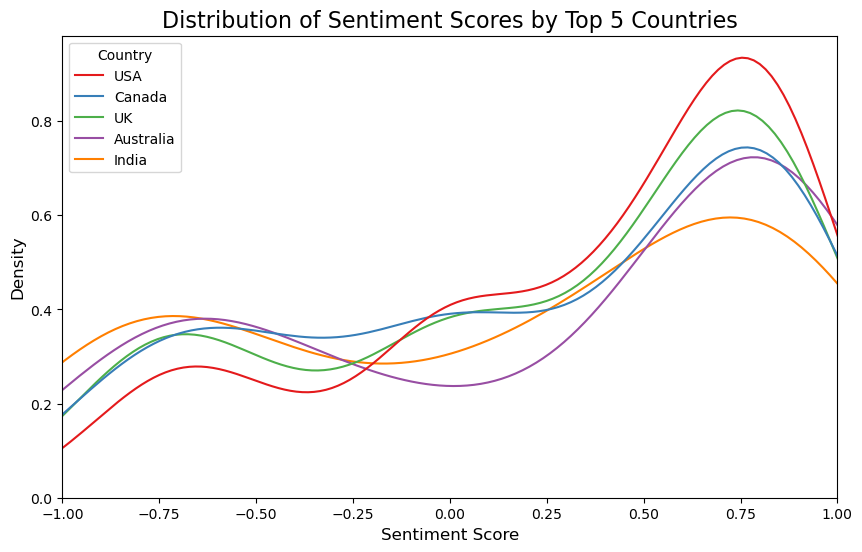

In [71]:
# Filter the data to include only the top 5 countries
top_5_countries = df['Country'].value_counts().head(5).index.tolist()

# Filter the data for these top countries
filtered_data = df[df['Country'].isin(top_5_countries)]

# Create a density plot for sentiment scores in the top 5 countries
plt.figure(figsize=(10, 6))
sns.kdeplot(data=filtered_data, x='Sentiment_Score_VADER', hue='Country', common_norm=False, palette='Set1')
plt.title('Distribution of Sentiment Scores by Top 5 Countries', fontsize=16)
plt.xlim(-1, 1)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=filtered_data, x='TextBlob_Polarity', hue='Country', common_norm=False, palette='Set1')
plt.title('Distribution of Sentiment Scores by Top 5 Countries', fontsize=16)
plt.xlim(-1, 1)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

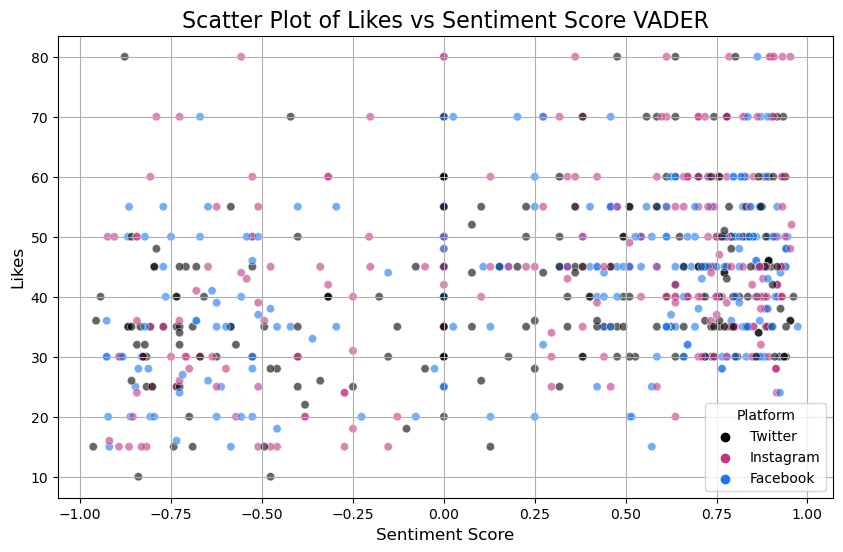

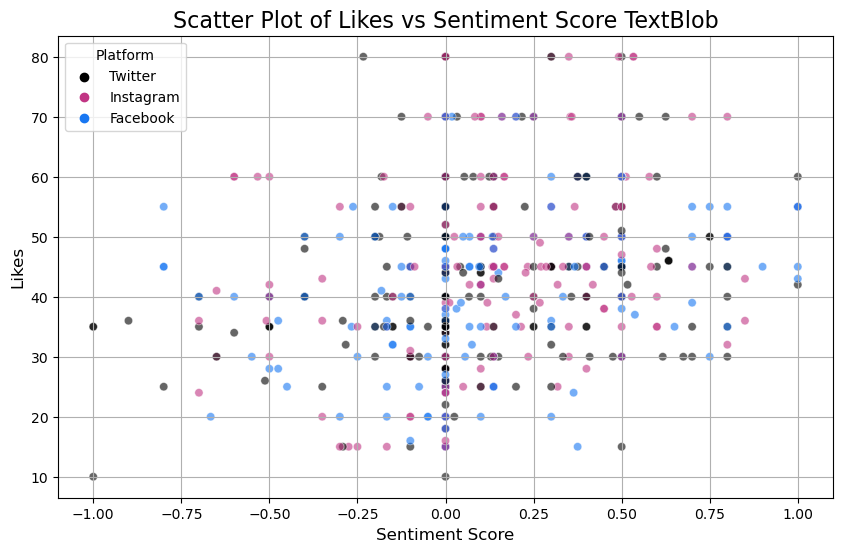

In [75]:
# Create a scatter plot of likes vs sentiment
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sentiment_Score_VADER', y='Likes', hue='Platform', palette=colors, alpha=0.6)
plt.title('Scatter Plot of Likes vs Sentiment Score VADER', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Likes', fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TextBlob_Polarity',y='Likes', hue='Platform', palette=colors, alpha=0.6)
plt.title('Scatter Plot of Likes vs Sentiment Score TextBlob', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Likes', fontsize=12)
plt.grid(True)
plt.show()

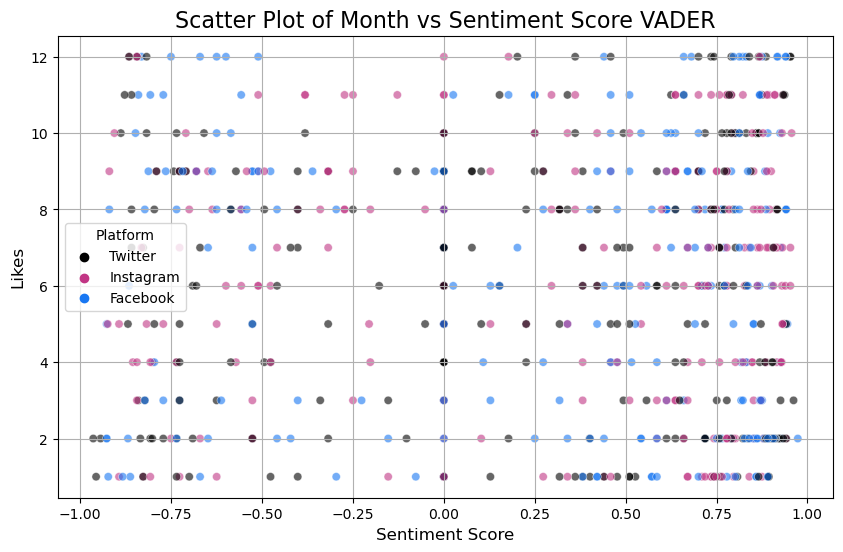

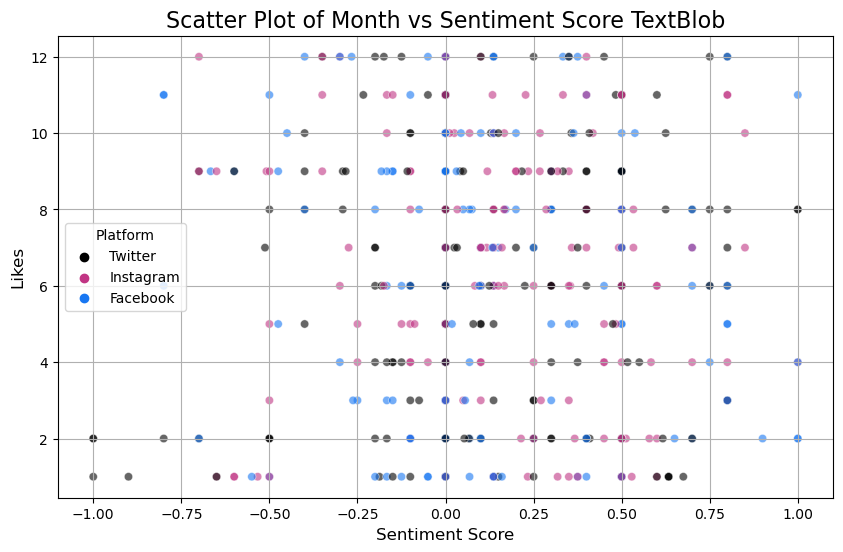

In [76]:
#Create a scatter plots sentiment vs month 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sentiment_Score_VADER', y='Month', hue='Platform', palette=colors, alpha=0.6)
plt.title('Scatter Plot of Month vs Sentiment Score VADER', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Likes', fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TextBlob_Polarity',y='Month', hue='Platform', palette=colors, alpha=0.6)
plt.title('Scatter Plot of Month vs Sentiment Score TextBlob', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Likes', fontsize=12)
plt.grid(True)
plt.show()

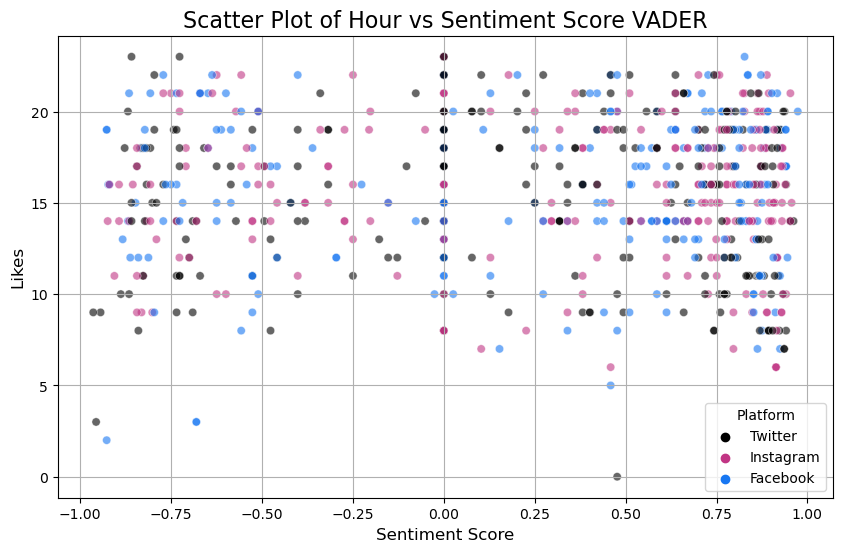

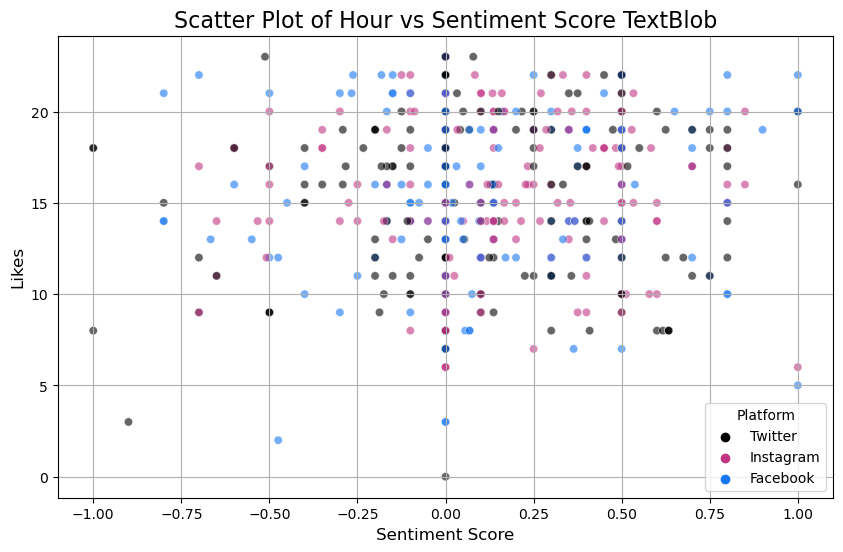

In [77]:
# Create a scatter plot for sentiment Score vs hour
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sentiment_Score_VADER', y='Hour', hue='Platform', palette=colors, alpha=0.6)
plt.title('Scatter Plot of Hour vs Sentiment Score VADER', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Likes', fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TextBlob_Polarity',y='Hour', hue='Platform', palette=colors, alpha=0.6)
plt.title('Scatter Plot of Hour vs Sentiment Score TextBlob', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Likes', fontsize=12)
plt.grid(True)
plt.show()

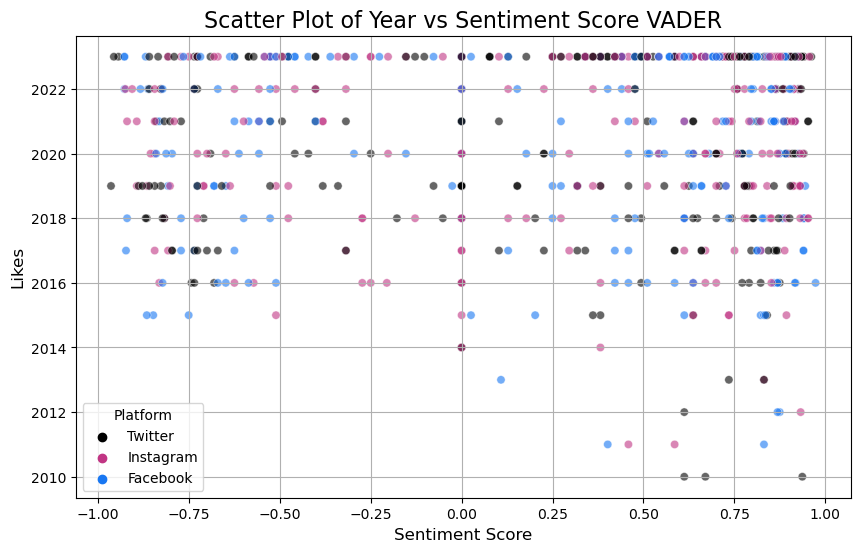

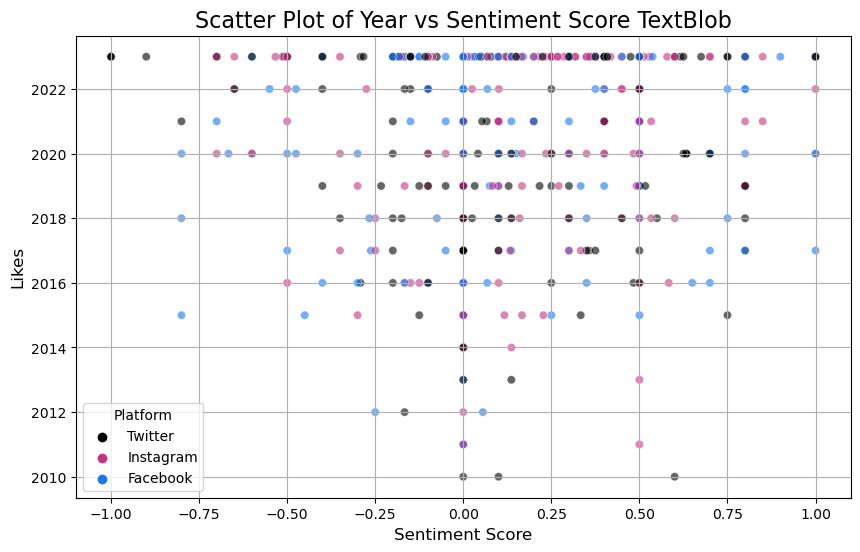

In [79]:
# Create a scatter plot for Year vs Sentiment Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sentiment_Score_VADER', y='Year', hue='Platform', palette=colors, alpha=0.6)
plt.title('Scatter Plot of Year vs Sentiment Score VADER', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Likes', fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TextBlob_Polarity',y='Year', hue='Platform', palette=colors, alpha=0.6)
plt.title('Scatter Plot of Year vs Sentiment Score TextBlob', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Likes', fontsize=12)
plt.grid(True)
plt.show()

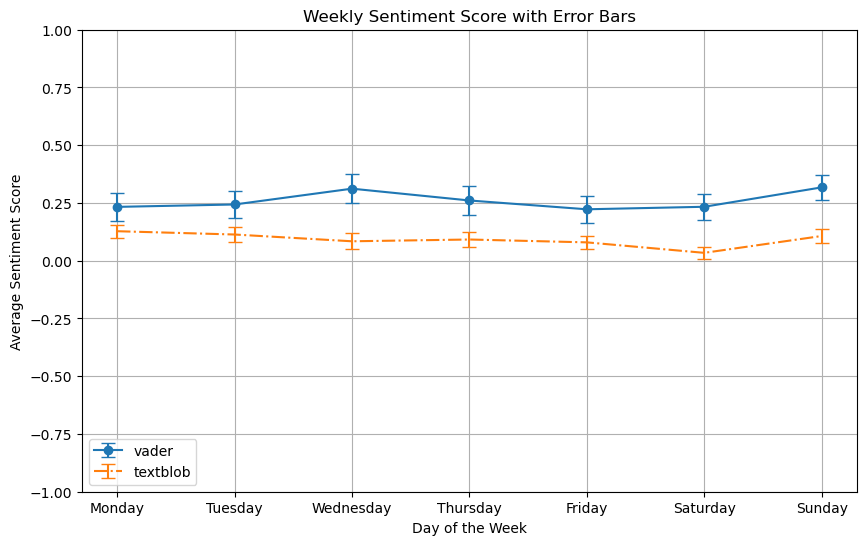

In [106]:
# Create a new column for the day of the week
df['Day_of_Week'] = pd.to_datetime(df['Timestamp'], errors='coerce').dt.day_name()

# Calculate the mean and standard error of the sentiment scores grouped by day of the week
weekly_sentiment_vader = df.groupby('Day_of_Week')['Sentiment_Score_VADER'].agg(['mean', 'sem']).reset_index()
weekly_sentiment_tb = df.groupby('Day_of_Week')['TextBlob_Polarity'].agg(['mean', 'sem']).reset_index()

# Sorting by day of the week for proper sequential plotting
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_sentiment_vader['Day_of_Week'] = pd.Categorical(weekly_sentiment_vader['Day_of_Week'], categories=day_order, ordered=True)
weekly_sentiment_tb['Day_of_Week'] = pd.Categorical(weekly_sentiment_tb['Day_of_Week'], categories=day_order, ordered=True)
weekly_sentiment_vader = weekly_sentiment_vader.sort_values('Day_of_Week')
weekly_sentiment_tb = weekly_sentiment_tb.sort_values('Day_of_Week')

# Create the plot
plt.figure(figsize=(10, 6))
plt.errorbar(x=weekly_sentiment_vader['Day_of_Week'], y=weekly_sentiment_vader['mean'], yerr=weekly_sentiment_vader['sem'], fmt='-o', capsize=5, label='vader')
plt.errorbar(x=weekly_sentiment_tb['Day_of_Week'], y=weekly_sentiment_tb['mean'], yerr=weekly_sentiment_tb['sem'], fmt='-.', capsize=5, label='textblob')
plt.title('Weekly Sentiment Score with Error Bars')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sentiment Score')
plt.ylim(-1,1)
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

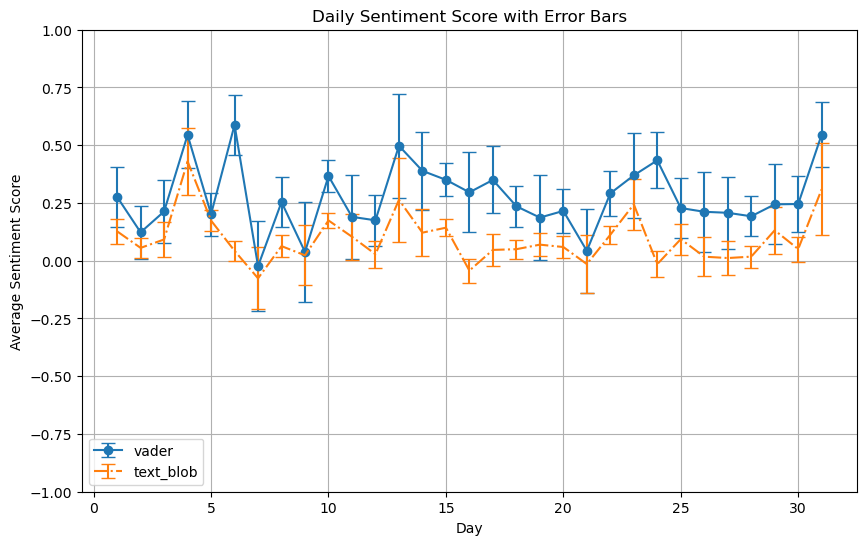

In [104]:
#Create a line plot sentiment vs day of the month 
Daily_sentiment_vader = df.groupby('Day')['Sentiment_Score_VADER'].agg(['mean', 'sem']).reset_index()
Daily_sentiment_textblob= df.groupby('Day')['TextBlob_Polarity'].agg(['mean', 'sem']).reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.errorbar(x=Daily_sentiment_vader['Day'], y=Daily_sentiment_vader['mean'], yerr=Daily_sentiment_vader['sem'], fmt='-o', capsize=5, label = 'vader')
plt.errorbar(x=Daily_sentiment_textblob['Day'], y=Daily_sentiment_textblob['mean'], yerr=Daily_sentiment_textblob['sem'], fmt='-.', capsize=5, label = 'text_blob')
plt.title('Daily Sentiment Score with Error Bars')
plt.xlabel('Day')
plt.ylim(-1,1)
plt.ylabel('Average Sentiment Score')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

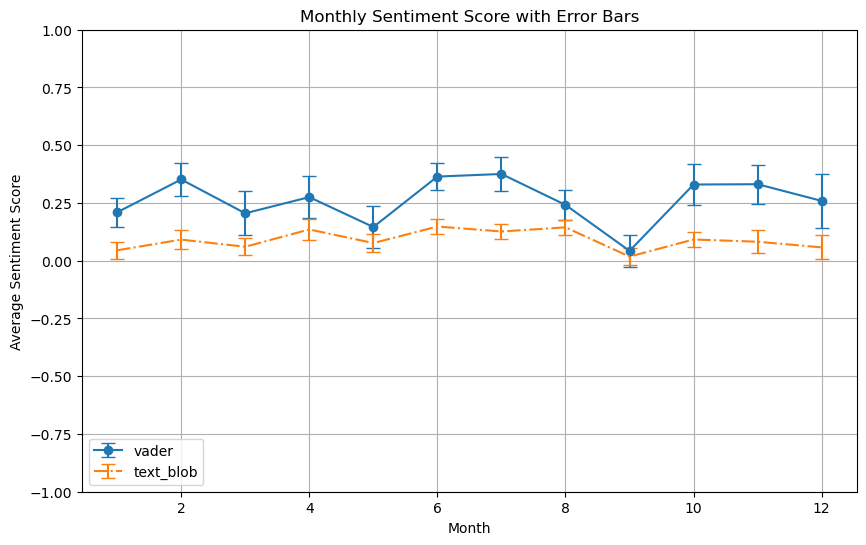

In [103]:
#Create a line plot sentiment vs month 
Monthly_sentiment_vader = df.groupby('Month')['Sentiment_Score_VADER'].agg(['mean', 'sem']).reset_index()
Monthly_sentiment_textblob= df.groupby('Month')['TextBlob_Polarity'].agg(['mean', 'sem']).reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.errorbar(x=Monthly_sentiment_vader['Month'], y=Monthly_sentiment_vader['mean'], yerr=Monthly_sentiment_vader['sem'], fmt='-o', capsize=5, label = 'vader')
plt.errorbar(x=Monthly_sentiment_textblob['Month'], y=Monthly_sentiment_textblob['mean'], yerr=Monthly_sentiment_textblob['sem'], fmt='-.', capsize=5, label = 'text_blob')
plt.title('Monthly Sentiment Score with Error Bars')
plt.xlabel('Month')
plt.ylim(-1,1)
plt.ylabel('Average Sentiment Score')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

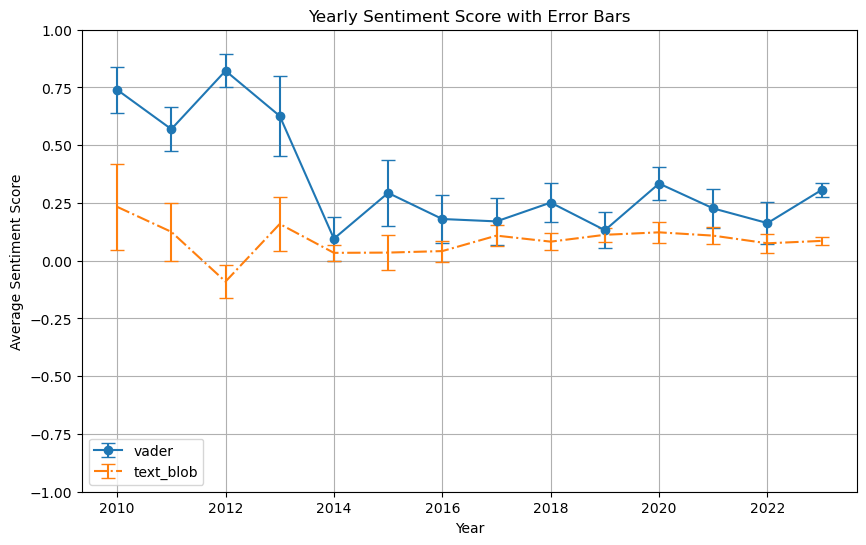

In [102]:
#Create a line plot sentiment vs month 
yearly_sentiment_vader = df.groupby('Year')['Sentiment_Score_VADER'].agg(['mean', 'sem']).reset_index()
yearly_sentiment_textblob= df.groupby('Year')['TextBlob_Polarity'].agg(['mean', 'sem']).reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.errorbar(x=yearly_sentiment_vader['Year'], y=yearly_sentiment_vader['mean'], yerr=yearly_sentiment_vader['sem'], fmt='-o', capsize=5, label = 'vader')
plt.errorbar(x=yearly_sentiment_textblob['Year'], y=yearly_sentiment_textblob['mean'], yerr=yearly_sentiment_textblob['sem'], fmt='-.', capsize=5, label = 'text_blob')
plt.title('Yearly Sentiment Score with Error Bars')
plt.xlabel('Year')
plt.ylim(-1,1)
plt.ylabel('Average Sentiment Score')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

In [86]:
# most common words
# Function to process text and return most common words
df['common_word_list'] = df['Text_Combined'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df['common_word_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

top_words_df.style.background_gradient(cmap='Blues')

In [91]:
# Function to process text and return most common positve words in VADER
top = Counter([item for sublist in df[df['Sentiment_VADER'] == 'Positive']['common_word_list'] for item in sublist])
positive = pd.DataFrame(top.most_common(10), columns=['Common_Words', 'Count'])
positive.style.background_gradient(cmap='Greens')

In [92]:
top = Counter([item for sublist in df[df['Sentiment_TextBlob'] == 'Positive']['common_word_list'] for item in sublist])
positive = pd.DataFrame(top.most_common(10), columns=['Common_Words', 'Count'])
positive.style.background_gradient(cmap='Greens')

In [93]:
# Function to process text and return most common neutral words in VADER
top = Counter([item for sublist in df[df['Sentiment_VADER'] == 'Neutral']['common_word_list'] for item in sublist])
neutral = pd.DataFrame(top.most_common(10), columns=['Common_Words', 'Count'])
neutral.style.background_gradient(cmap='gray')

In [94]:
# Function to process text and return most common neutral words 
top = Counter([item for sublist in df[df['Sentiment_TextBlob'] == 'Neutral']['common_word_list'] for item in sublist])
neutral = pd.DataFrame(top.most_common(10), columns=['Common_Words', 'Count'])
neutral.style.background_gradient(cmap='gray')

In [95]:
# Function to process text and return most common negative words in VADER
top = Counter([item for sublist in df[df['Sentiment_VADER'] == 'Negative']['common_word_list'] for item in sublist])
negative = pd.DataFrame(top.most_common(10), columns=['Common_Words', 'Count'])
negative.style.background_gradient(cmap='Reds')

In [96]:
top = Counter([item for sublist in df[df['Sentiment_TextBlob'] == 'Negative']['common_word_list'] for item in sublist])
negative = pd.DataFrame(top.most_common(10), columns=['Common_Words', 'Count'])
negative.style.background_gradient(cmap='Reds')